# A/B test for the cooking website

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np

data = pd.read_csv('assessment_da25.csv')
data.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


## aggregating metrics

In [19]:
metrics_by_variant = test_data.groupby('Variant').agg({
    'Number of page views': 'mean',
    'GMV (in $)': 'mean',
    'Number of add to cart': 'mean',
    'Clicks on media': 'mean',
    'Time on Page (sec)': 'mean',
}).reset_index()

metrics_by_variant

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec)
0,A,4.985,7.68999,1.884,1.495,20.543
1,B,5.317,9.28953,2.469,1.324,20.047


In [28]:
# Checking the sample size
sample_sizes = data['Variant'].value_counts()
print(sample_sizes)

Variant
A    1000
B    1000
Name: count, dtype: int64


## Distributions

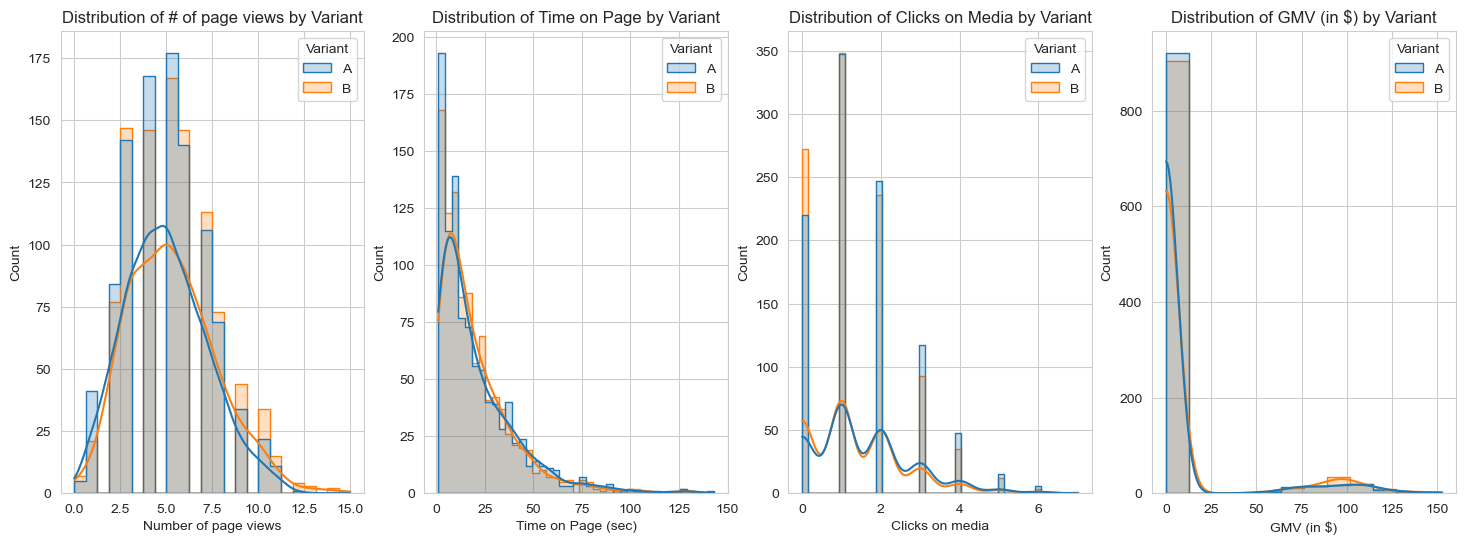

In [34]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

sns.histplot(data=data, x="Number of page views", hue="Variant", kde=True, ax=axes[0], element="step")
axes[0].set_title('Distribution of # of page views by Variant')

sns.histplot(data=data, x="Time on Page (sec)", hue="Variant", kde=True, ax=axes[1], element="step")
axes[1].set_title('Distribution of Time on Page by Variant')

sns.histplot(data=data, x="Clicks on media", hue="Variant", kde=True, ax=axes[2], element="step")
axes[2].set_title('Distribution of Clicks on Media by Variant')

sns.histplot(data=data, x="GMV (in $)", hue="Variant", kde=True, ax=axes[3], element="step")
axes[3].set_title('Distribution of GMV (in $) by Variant')


plt.show()

In [40]:
## Distribution attributes for clicks on media in variation a
variant_a_stats = data[data['Variant'] == 'A']['Clicks on media'].describe()
print("Variation A Clicks on media Stats:\n", variant_a_stats)

Variation A Clicks on media Stats:
 count    1000.000000
mean        1.495000
std         1.230239
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: Clicks on media, dtype: float64


In [39]:
## Distribution attributes for clicks on media in variation b
variant_a_stats = data[data['Variant'] == 'B']['Clicks on media'].describe()
print("Variant B Clicks on media Stats:\n", variant_a_stats)

Variant B Clicks on media Stats:
 count    1000.000000
mean        1.324000
std         1.180855
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Clicks on media, dtype: float64


In [33]:
## Distribution attributes for Number of page views in variation a
variant_a_stats = data[data['Variant'] == 'A']['Number of page views'].describe()
print("Variant A Number of page views Stats:\n", variant_a_stats)

Variant A Number of page views Stats:
 count    1000.000000
mean        4.985000
std         2.236465
min         0.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        12.000000
Name: Number of page views, dtype: float64


In [34]:
## Distribution attributes for Number of page views in variation b
variant_a_stats = data[data['Variant'] == 'B']['Number of page views'].describe()
print("Variant B Number of page views Stats:\n", variant_a_stats)

Variant B Number of page views Stats:
 count    1000.000000
mean        5.317000
std         2.417096
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        15.000000
Name: Number of page views, dtype: float64


In [35]:
## Distribution attributes for Time on Page (sec) in variation a
variant_a_stats = data[data['Variant'] == 'A']['Time on Page (sec)'].describe()
print("Variant A Time on Page (sec) Stats:\n", variant_a_stats)

Variant A Time on Page (sec) Stats:
 count    1000.000000
mean       20.543000
std        20.596076
min         1.000000
25%         6.000000
50%        13.000000
75%        29.000000
max       143.000000
Name: Time on Page (sec), dtype: float64


In [36]:
## Distribution attributes for Time on Page (sec) in variation a
variant_a_stats = data[data['Variant'] == 'B']['Time on Page (sec)'].describe()
print("Variant B Time on Page (sec) Stats:\n", variant_a_stats)

Variant B Time on Page (sec) Stats:
 count    1000.000000
mean       20.047000
std        19.319784
min         1.000000
25%         7.000000
50%        14.000000
75%        28.000000
max       132.000000
Name: Time on Page (sec), dtype: float64


In [37]:
## Distribution attributes for GMV (in $) in variation a
variant_a_stats = data[data['Variant'] == 'A']['GMV (in $)'].describe()
print("Variant A GMV (in $) Stats:\n", variant_a_stats)

Variant A GMV (in $) Stats:
 count    1000.000000
mean        7.689990
std        26.794816
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       152.610000
Name: GMV (in $), dtype: float64


In [38]:
## Distribution attributes for GMV (in $) in variation b
variant_a_stats = data[data['Variant'] == 'B']['GMV (in $)'].describe()
print("Variant B GMV (in $) Stats:\n", variant_a_stats)

Variant B GMV (in $) Stats:
 count    1000.000000
mean        9.289530
std        28.879687
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       141.270000
Name: GMV (in $), dtype: float64


## two-sample T-test
### Conducting the two-tailed T-test for the null hypothesis

In [12]:
stats.ttest_ind(data[data['Variant'] == 'A']['Clicks on media'], data[data['Variant'] == 'B']['Clicks on media'], equal_var=False)

TtestResult(statistic=3.1710702328903153, pvalue=0.001541857715988478, df=1994.655646693956)

In [11]:
stats.ttest_ind(data[data['Variant'] == 'A']['Number of page views'], data[data['Variant'] == 'B']['Number of page views'], equal_var=False)

TtestResult(statistic=-3.1881645133877003, pvalue=0.001454076157215842, df=1986.0667437668926)

In [10]:
stats.ttest_ind(data[data['Variant'] == 'A']['Time on Page (sec)'], data[data['Variant'] == 'B']['Time on Page (sec)'], equal_var=False)

TtestResult(statistic=0.5554299489081426, pvalue=0.5786630478332149, df=1989.8790205360176)

In [9]:
stats.ttest_ind(data[data['Variant'] == 'A']['GMV (in $)'], data[data['Variant'] == 'B']['GMV (in $)'], equal_var=False)

TtestResult(statistic=-1.2839539769831623, pvalue=0.19930776178517312, df=1986.8862227081215)

In [ ]:
## Our primary metric's p-value is smaller than the alpha we assigned (5 percent) which means that we can reject the null hypthsesis for the primary metric and there is a significant difference between the means. for all the other metric is the same except time on page (Sec)

In [17]:
## now we do the test for the alternative hypothsis for the metrics that had a lower p-vale than alpha

## Perform t-test with alternative hypothesis that variation A is better (because clicks on media in the variant a is higher)
t_statistic, p_value = stats.ttest_ind(data[data['Variant'] == 'B']['Clicks on media'],
                                       data[data['Variant'] == 'A']['Clicks on media'],
                                       alternative='less', equal_var=False)

print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-Statistic: -3.1710702328903153
P-value: 0.000770928857994239


In [15]:
t_statistic, p_value = stats.ttest_ind(data[data['Variant'] == 'B']['Number of page views'],
                                       data[data['Variant'] == 'A']['Number of page views'],
                                       alternative='greater', equal_var=False)

print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-Statistic: 3.1881645133877003
P-value: 0.000727038078607921


In [19]:
t_statistic, p_value = stats.ttest_ind(data[data['Variant'] == 'B']['GMV (in $)'],
                                       data[data['Variant'] == 'A']['GMV (in $)'],
                                       alternative='greater', equal_var=False)

print(f"T-Statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-Statistic: 1.2839539769831623
P-value: 0.09965388089258656


In [20]:
## The result: click on media (our primary metric) is better is variation A. for time on page, there is no significant difference. for number of page views, variation B is better, for gmv, the p-value in our one-tail test is higher than alpha which we don't have strong enough evidence to suggest variation B is performing better in this metric.

In [24]:
## calculating effect size and confidence interval for clicks on media
variant_a_clicks = data[data['Variant'] == 'A']['Clicks on media']
variant_b_clicks = data[data['Variant'] == 'B']['Clicks on media']

# Calculating means and standard deviations
mean_a = np.mean(variant_a_clicks)
mean_b = np.mean(variant_b_clicks)
std_a = np.std(variant_a_clicks, ddof=1)
std_b = np.std(variant_b_clicks, ddof=1)

# Sample sizes
n_a = len(variant_a_clicks)
n_b = len(variant_b_clicks)

# Calculating pooled standard deviation 
s_pooled = np.sqrt(((n_a - 1) * std_a**2 + (n_b - 1) * std_b**2) / (n_a + n_b - 2))

# Calculating effect size 
d = (mean_a - mean_b) / s_pooled

# Calculating standard error and margin of error for a 95% confidence interval
se_difference = np.sqrt(std_a**2/n_a + std_b**2/n_b)
margin_of_error = stats.t.ppf(0.975, df=n_a + n_b - 2) * se_difference  # 0.975 for 95% CI, adjust for your df

# Confidence interval
ci_lower = (mean_a - mean_b) - margin_of_error
ci_upper = (mean_a - mean_b) + margin_of_error

print(f"Effect Size (Cohen's d) for clicks on media: {d}")
print(f"95% Confidence Interval for the difference in means for clicks on media: [{ci_lower}, {ci_upper}]")


Effect Size (Cohen's d) for clicks on media: 0.14181457204337689
95% Confidence Interval for the difference in means for clicks on media: [0.06524485428964767, 0.2767551457103524]


In [25]:
## calculating effect size and confidence interval for number of page views
variant_a_clicks = data[data['Variant'] == 'A']['Number of page views']
variant_b_clicks = data[data['Variant'] == 'B']['Number of page views']
mean_a = np.mean(variant_a_clicks)
mean_b = np.mean(variant_b_clicks)
std_a = np.std(variant_a_clicks, ddof=1)
std_b = np.std(variant_b_clicks, ddof=1)
n_a = len(variant_a_clicks)
n_b = len(variant_b_clicks)
s_pooled = np.sqrt(((n_a - 1) * std_a**2 + (n_b - 1) * std_b**2) / (n_a + n_b - 2))
d = (mean_a - mean_b) / s_pooled
se_difference = np.sqrt(std_a**2/n_a + std_b**2/n_b)
margin_of_error = stats.t.ppf(0.975, df=n_a + n_b - 2) * se_difference  # 0.975 for 95% CI, adjust for your df
ci_lower = (mean_a - mean_b) - margin_of_error
ci_upper = (mean_a - mean_b) + margin_of_error
print(f"Effect Size (Cohen's d): {d}")
print(f"95% Confidence Interval for the difference in means: [{ci_lower}, {ci_upper}]")


Effect Size (Cohen's d): -0.14257905150774833
95% Confidence Interval for the difference in means: [-0.53622486549602, -0.12777513450397968]


In [26]:
## calculating effect size and confidence interval for gmv 
variant_a_clicks = data[data['Variant'] == 'A']['GMV (in $)']
variant_b_clicks = data[data['Variant'] == 'B']['GMV (in $)']
mean_a = np.mean(variant_a_clicks)
mean_b = np.mean(variant_b_clicks)
std_a = np.std(variant_a_clicks, ddof=1)
std_b = np.std(variant_b_clicks, ddof=1)
n_a = len(variant_a_clicks)
n_b = len(variant_b_clicks)
s_pooled = np.sqrt(((n_a - 1) * std_a**2 + (n_b - 1) * std_b**2) / (n_a + n_b - 2))
d = (mean_a - mean_b) / s_pooled
se_difference = np.sqrt(std_a**2/n_a + std_b**2/n_b)
margin_of_error = stats.t.ppf(0.975, df=n_a + n_b - 2) * se_difference  # 0.975 for 95% CI, adjust for your df
ci_lower = (mean_a - mean_b) - margin_of_error
ci_upper = (mean_a - mean_b) + margin_of_error
print(f"Effect Size (Cohen's d): {d}")
print(f"95% Confidence Interval for the difference in means: [{ci_lower}, {ci_upper}]")


Effect Size (Cohen's d): -0.05742016745031098
95% Confidence Interval for the difference in means: [-4.042728112694357, 0.8436481126943574]
